# Problemas de variables aleatorias (versión Python)

Conversión del documento original en R a un cuaderno de Jupyter con enunciados en Markdown y soluciones en Python.

Este notebook usa:

```python
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from collections import Counter
from scipy.special import comb
```

Las funciones de probabilidad/distribución se implementan con fórmulas básicas (sin usar librerías externas como `scipy`) para que el código sea lo más transparente posible.


In [16]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

### Antes de ejecutar esto, es necesario hacer 
## pip install empiricaldist 
## en Terminal
from empiricaldist import Pmf


## Recordatorio: Variable aleatoria geométrica

Sea $0 < p < 1$. Diremos que $X \sim \operatorname{Geom}(p)$ (forma *número de fracasos antes del primer éxito*) si

\begin{align*}
  \operatorname{P}(X = k) &= q^k p, \quad k = 0,1,2,\dots,\\
q &= 1-p,\\
 \operatorname{E}(X) &= \frac{1-p}{p},\\
\operatorname{Var}(X) &= \frac{1-p}{p^2}.
\end{align*}

A continuación definimos funciones para la **f.d.p.**, **f.d.c.** y para simular muestras.


In [17]:
from scipy.stats import geom
X = geom(p=0.3)
muestras = X.rvs(50)
print(f"Random samples: {muestras}")

X.cdf(3)
X.mean()

Random samples: [ 2  1  1 10  1  3 12  7  6  3  1  3  8  1  8  3  7  7  8  1  1  4  5  1
  2  1  2 16  1  3  2  5  5  1  2  2  2  2  3  2  1  2  8  2  1 16  1  1
  3  3]


3.3333333333333335

In [18]:
X.pmf(3)

0.14699999999999996

In [19]:
X.cdf(3)

0.6569999999999999

In [20]:
X.ppf(0.3)

1.0

In [21]:
X.mean()

3.3333333333333335

In [22]:
X.var()

7.777777777777779

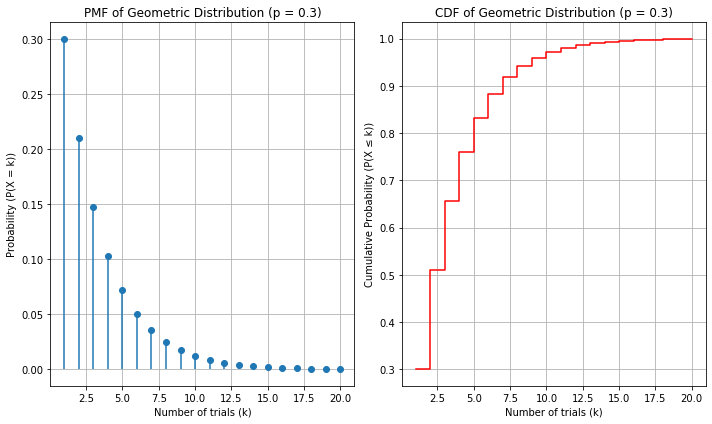

In [23]:
k_values = np.arange(1, 21)  # k = 1 to 20 (number of trials)

# PMF: Probability of having exactly k trials before the first success
pmf_values = X.pmf(k_values)

# CDF: Probability of having k or fewer trials before the first success
cdf_values = X.cdf(k_values)

# Plot PMF
plt.figure(figsize=(10, 6))

# Plot the PMF
plt.subplot(1, 2, 1) ## 1 fila, 2 columnas, primer elemento de la fila
plt.stem(k_values, pmf_values, basefmt=" ", use_line_collection=True)
plt.title("PMF of Geometric Distribution (p = 0.3)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Probability (P(X = k))")
plt.grid(True)

# Plot the CDF
plt.subplot(1, 2, 2) ## 1 fila, 2 columnas, segundo elemento de la fila
plt.step(k_values, cdf_values, where='post', color='r', linestyle='-')
plt.title("CDF of Geometric Distribution (p = 0.3)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Cumulative Probability (P(X ≤ k))")
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

## Recordatorio: Variable aleatoria binomial

Sea $0 < p < 1$ y $N \ge 1$. Diremos que $X \sim \operatorname{Binom}(N,p)$ si

\begin{align*}
\mathbb P(X = k) &= {N \choose k} p^k (1-p)^{N-k}, \quad k = 0,\dots,N,\\
\mathbb E(X) &= Np,\\
\operatorname{Var}(X) &= Np(1-p).
\end{align*}

Implementamos las funciones básicas análogas a `dbinom`, `pbinom`, `qbinom` y `rbinom`.


## Recordatorio: Variable aleatoria de Poisson

Sea $\lambda > 0$. Diremos que $X \sim \operatorname{Pois}(\lambda)$ si

\begin{align*}
\mathbb P(X = k) &= e^{-\lambda} \dfrac{\lambda^k}{k!}, \quad k = 0,1,2,\dots,\\
\mathbb E(X) &= \lambda,\\
\operatorname{Var}(X) &= \lambda.
\end{align*}


<font color='blue'><strong> 

3. Una persona llega a una estación de tren. Los trenes salen cada 10 minutos. El tiempo entre su llegada y la partida del siguiente tren se distribuye uniformemente en $[0,10]$ minutos.

Sea $X =$ «Tiempo de espera hasta salir en tren».

1. Analiza la variable.
2. Calcula $\mathbb P(X > 4)$.
3. Calcula la probabilidad de que, entre 5 días tomados al azar, en **al menos 2** de ellos haya esperado menos de 4 minutos.
    </strong> </font> 

<h3> Solución. </h3>

 * Se trata, obviamente, de una variable uniforme (continua) en el intervalo [0,10], $X\sim \operatorname{Unif}([0,10])$. 
 
 * Por tanto, 
 
 $$P[X>4]= 1-P(X\leq 4)= 1-4/10 =6/10.$$


In [27]:
6/10


0.6

Resppondemos ahora al apartado siguiente: <font color='blue'> <strong> c. Calcular la probabilidad de que entre cinco días tomados al azar, en al menos dos de ellos haya tenido que esperar menos de 4 minutos.</strong></font>


Aquí la variable a considerar es $Y=$ ``Número de días que espero menos de 4 minutos'' (sabiendo que el experimento lo repetimos 5 veces). Se trata de una binomial $Y\sim Binom(5,p)$ donde $p=P(X\leq 4)=4/10$. Queremos calcular 
\begin{eqnarray*}
    P(Y\geq 2)&=& 1-P(Y<2)\\
    &=& 1-P(Y\leq 1)\\
    &=& 1-P(Y=0)-P(Y=1)\\
    &=& 1-\binom{5}{0}(1-p)^5-\binom{5}{1}p(1-p)^4
\end{eqnarray*}
  

In [28]:
from scipy.stats import binom
import matplotlib.pyplot as plt
p=4/10
Y=binom(5,p)
solucion=1-Y.cdf(1)
solucion

0.6630400000000001


<font color='blue'> <strong> 4. Las campanas de la catedral de Murcia suenan cada 15 minutos. Suponiendo que una persona pasa todos los días por la plaza del Cardenal Belluga en un momento totalmente aleatorio, ¿cuál será la función de densidad de la variable aleatoria X =
‘tiempo de espera hasta que suenen las campanas’? ¿Cuál será la probabilidad de que la persona se tuviera que esperar entre 5 y 10 minutos? ¿Cuál será el tiempo medio de espera?</strong> </font>



 La variable es uniforme $X\sim \operatorname{Unif}([0,15])$. Su función de densidad es 
$$
f(x)= \left\{\begin{array}{lll} 1/15 & si\ 0\leq x\leq 15 \\ 0 & otro\ caso \end{array}\right.
$$
La probabilidad que nos piden es $$P(5\leq X\leq 10)=\int_5^{10} f(x)dx=5/15=1/3.$$
El tiempo medio de espera es
$$\mu=\int_0^{15} xf(x)dx=5/15=1/3=\int_0^{15} \frac{x}{15}dx=\frac{1}{15} \frac{15^2}{2}=\frac{15}{2}=7.5 $$

In [31]:
from scipy.stats import uniform
X=uniform(0,15)
solucion=X.mean()
solucion

7.5

<text><font color='blue'> <strong> 5. Los tiempos en un proceso industrial se distribuyen aleatoriamente entre 20 y 40 minutos. Sea X =’Tiempo de un proceso’. Analiza la variable. Calcular la
probabilidad de que un proceso elegido al azar tarde menos de 25 minutos.</strong> </font>



La variable es uniforme $X\sim \operatorname{Unif}([20,40])$. Su función de densidad es 
$$
f(x)= \left\{\begin{array}{lll} 1/20 & si\ 20\leq x\leq 40 \\ 0 & otro\ caso \end{array}\right.
$$
La probabilidad que nos piden es $$P(20\leq X\leq 25)=\int_{20}^{25} f(x)dx=5/20=1/4.$$

In [38]:
from scipy.stats import uniform

X = uniform(loc=20, scale=40-20)
solucion = X.cdf(25) - X.cdf(20)
solucion

0.25

<font color='blue'> <strong> 6. Un lenguaje de programación tiene una función random() que proporciona
números aleatorios entre 0 y 10. Saco un número y me interesa  X = ‘Número sacado’.  Analiza la variable. Si saco dos números calcula la probabilidad de que uno de los dos sea mayor que 8.</strong> </font>

<h3> Solución.</h3>

Aquí el problema está formulado de manera ambigua: no nos dicen si el número es real (i.e., cualquiera del intervalo [0,10]) -en cuyo caso la v.a. es continua uniforme $X\sim {\rm Unif}([0,10])$; o si el número es un entero -en cuyo caso es una v.a. discreta uniforme. Por otra parte, cuando el problema dice que ''uno de los dos'' sea mayor que 8, no aclara si es ''exactamente uno'' o si quiere decir ''al menos uno''. Vamos a asumir la segunda posibilidad (es decir, que pregunta por la probabilidad de que al menos uno de los dos sea mayor que 8) y vamos a responder en ambos casos (continuo y discreto). 

<strong> Caso 1: La v.a. es continua.</strong>  Se trata, por tanto, de $X\sim Unif([0,10])$. Recordemos que si $X\sim Unif([0,10])$ entonces 
$E(X)=\frac{a+b}{2}$ y $V(X)=\frac{(b-a)^2}{12}$. Por tanto, 
Entonces su media es $5$, su desviación típica es $\sqrt{100/12}$.

In [39]:
(100/12)**0.5

2.886751345948129

Ahora consideremos que sacamos dos números $X_1,X_2$. Evidentemente, las tiradas las asumimos independientes. Entonces 


\begin{eqnarray*}
    &\ & P(\{X_1>8\}\cup \{X_2>8\}) \\
    &=& P(\{X_1>8\})+P(\{X_2>8\})-P(\{X_1>8\}\cap \{X_2>8\}) \\
    &=& P(\{X_1>8\})+P(\{X_2>8\})-P(\{X_1>8\})P(\{X_2>8\})\\
    &=& 2/10+2/10-(2/10)^2
\end{eqnarray*} 



In [40]:
2/10+2/10-(2/10)**2

0.36

Nota: Obsérvese que en este caso, la probabilidad no cambia si cambiamos $>8$ por $\geq 8$. 

In [ ]:
<strong> Caso 2: La v.a. es discreta.</strong>  Entonces $X$ es uniforme en el conjunto: 
        $$\{0,1,2,3,4,5,6,7,8,9,10\}$$

In [42]:
val=np.array([0,1,2,3,4,5,6,7,8,9,10])
val

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Por lo que las probabilidades son:

In [43]:
prob=np.array([1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11])
prob

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

Con esta información podemos definir su función densidad de probabilidad:

In [45]:
def f(x):
    return np.sum(prob[val == x])

In [46]:
f_vec = np.vectorize(f)

In [47]:
# Definimos la función F(x) que calcula la suma acumulada de probabilidades hasta x
def F(x):
    return np.sum(prob[val <= x])

# Vectorize the function F for the entire val range
F_vec = np.vectorize(F)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


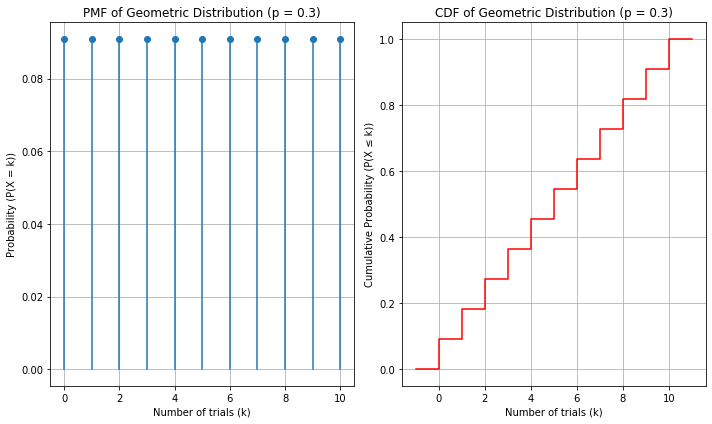

In [48]:
# Dibujamos la densidad de probabilidad (PMF) y la función de distribución (probabilidad acumulada (CDF))
plt.figure(figsize=(10, 6))

# Plot de la  PMF
plt.subplot(1, 2, 1)
plt.stem(val, f_vec(val), basefmt=" ")
plt.title("PMF of Geometric Distribution (p = 0.3)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Probability (P(X = k))")
plt.grid(True)

# Plot de la CDF
plt.subplot(1, 2, 2)
x_vals = np.array([min(val)-1, *val, max(val)+1])  # Auxiliary variable for extended range
plt.step(x_vals, F_vec(x_vals), where='post', color='r', linestyle='-')
plt.title("CDF of Geometric Distribution (p = 0.3)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Cumulative Probability (P(X ≤ k))")
plt.grid(True)

# Mostramos los gráficos:
plt.tight_layout()
plt.show()

In [49]:
# Cálculo de la media (o esperanza)
media_X = np.sum(val * f_vec(val))
print("Media :", media_X)

# Cálculo de la varianza 
var_X = np.sum((val - media_X)**2 * f_vec(val))
print("Varianza :", var_X)

# Cálculo de la desviación típica
dt_X = np.sqrt(var_X)
print("Desviación típica :", dt_X)

Media : 5.0
Varianza : 10.000000000000002
Desviación típica : 3.1622776601683795


Ahora consideremos que sacamos dos números $X_1,X_2$. Evidentemente, las tiradas las asumimos independientes. Entonces 


\begin{eqnarray*}
    &\ & P(\{X_1>8\}\cup \{X_2>8\}) \\
    &=& P(\{X_1>8\})+P(\{X_2>8\})-P(\{X_1>8\}\cap \{X_2>8\}) \\
    &=& P(\{X_1>8\})+P(\{X_2>8\})-P(\{X_1>8\})P(\{X_2>8\})\\
    &=& 2/11+2/11-(2/11)^2
\end{eqnarray*} 



In [50]:
2/11+2/11-(2/11)**2

0.3305785123966942

Obsérvese que en este caso, la probabilidad cambia si cambiamos $>8$ por $\geq 8$:


\begin{eqnarray*}
    &\ & P(\{X_1\geq 8\}\cup \{X_2\geq 8\}) \\
    &=& P(\{X_1\geq 8\})+P(\{X_2\geq 8\})-P(\{X_1\geq 8\}\cap \{X_2\geq 8\}) \\
    &=& P(\{X_1\geq 8\})+P(\{X_2\geq 8\})-P(\{X_1\geq 8\})P(\{X_2\geq 8\})\\
    &=& 3/11+3/11-(3/11)^2
\end{eqnarray*} 


In [52]:
3/11+3/11-(3/11)**2

0.47107438016528924

<font color='blue'> <strong> 7. Se tiene una cadena de 5 interruptores que pueden estar en posición 0 o 1. Sea 
$$X
= \text{``Número de interruptores en posición 1’'}.$$ Analiza la variable. ¿Cuál es la
probabilidad de que haya exactamente 3 interruptores en posición 1? </strong> </font> 

<h3> Solución.</h3>  
De nuevo la formulación del problema es ambigua porque no nos dicen con qué probabilidad está encendido/apagado  cada interruptor, y tampoco nos informan sobre posibles dependencias entre unos interruptores y otros. 

Se entiende, entonces, que: la probabilidad de encendido/apagado es la misma (es decir, 1/2) y los interruptores funcionan de forma independiente unos de otros. 

En estas condiciones, la variable $X$ es $X\sim {\rm Binom}(5,1/2)$, por lo que 


$$P(X=3)=\binom{5}{3} (1/2)^3(1/2)^{5-3}=\binom{5}{3} (1/2)^5$$

In [55]:
from scipy.stats import binom
X=binom(5,1/2)
solucion=X.pmf(3) ## Recuerda: pmd=probability mass function; En v.a. continuas se usa pdf= prob. density function
solucion

0.3125

<font color='blue'> <strong> 8. Siete de cada diez estudiantes aprueba el primer parcial de una asignatura. Se
seleccionan 8 estudiantes al azar. Sea X = ‘Número de alumnos que suspenden el
parcial’. Analiza la variable. Probabilidad de que exactamente 2 suspendan entre
    los 8 seleccionados. </strong> </font>

<h3> Solución. </h3> 
La variable $X$ es $\operatorname{Binom}(8,1-7/10)$ y nos piden $P(X=2)$

In [56]:
from scipy.stats import binom
X=binom(8,1-7/10)
solucion=X.pmf(2)
solucion

0.29647548

Vamos ahora a analizar la variable. Primero calculamos la media:

In [58]:
X.mean()

2.4000000000000004

Ahora la varianza y la desviación típica:

In [59]:
X.var()

1.6800000000000002

In [63]:
X.var()**0.5

1.2961481396815722

Ahora los cuartiles:

In [62]:
X.ppf([0.25,0.5,0.75])

array([1., 2., 3.])

Finalmente, dibujamos su función densidad de probabilidad y su distribución de probabilidad:

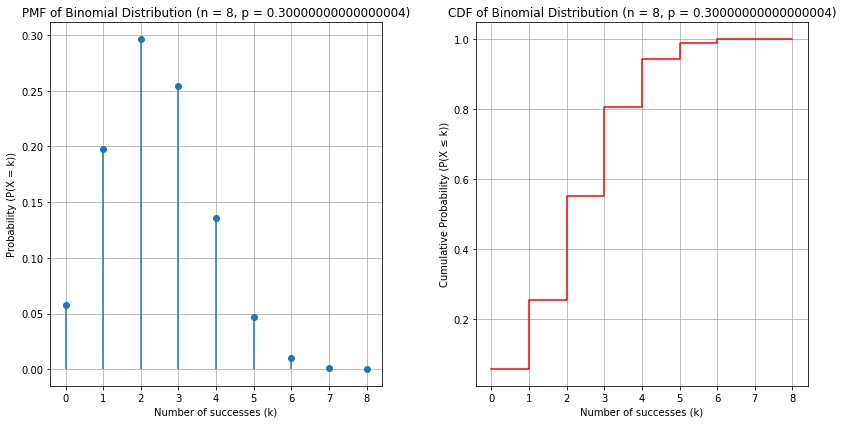

In [61]:
## Gráficos:

n = 8  # Number of trials
p = 1-7/10  # Probability of success

# Values of k (number of successes)
k_values = np.arange(0, n + 1)  # k = 0, 1, ..., n

# PMF: Probability of having exactly k successes
pmf_values = X.pmf(k_values)

# CDF: Probability of having at most k successes
cdf_values = X.cdf(k_values)

# Plot PMF
plt.figure(figsize=(12, 6))

# Plot the PMF
plt.subplot(1, 2, 1)
plt.stem(k_values, pmf_values, basefmt=" ", use_line_collection=True)
plt.title(f"PMF of Binomial Distribution (n = {n}, p = {p})")
plt.xlabel("Number of successes (k)")
plt.ylabel("Probability (P(X = k))")
plt.grid(True)

# Plot the CDF
plt.subplot(1, 2, 2)
plt.step(k_values, cdf_values, where='post', color='r', linestyle='-')
plt.title(f"CDF of Binomial Distribution (n = {n}, p = {p})")
plt.xlabel("Number of successes (k)")
plt.ylabel("Cumulative Probability (P(X ≤ k))")
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

<font color='magenta'> <strong> 9. Suponiendo que la probabilidad de ser niño es del $49\%$ y una familia tiene 6 hijos
sea X = ’Número de niñas’. Analiza la variable. ¿Cuál es la probabilidad de que
una familia de 6 hijos tenga 3 niños y 3 niñas? </strong> </font>


<h3> Solución. </h3>


<font color='magenta'> <strong> 10. Tiro 10 dados y me interesa el número de unos que sale. Analiza la variable.
Calcula la probabilidad de que salgan menos de dos unos. </strong> </font>


<h3> Solución. </h3>

<font color='blue'> <strong> 11. La probabilidad de aprobar una asignatura es del $35\%$. 
    Sea 
    
    X = ‘Convocatorias a las que me presento antes de aprobar’. 
    
Analiza la variable. ¿Cuál es la probabilidad de aprobar a la cuarta convocatoria? </strong> </font>



<h3> Solución. </h3>

En este caso estamos ante una variable aleatoria geométrica: 

$$X\sim \operatorname{Geom}(0.35).$$ 

Por tanto, $$P(X=k)=0.35\cdot (1-0.35)^k.$$ 


Con esta información podemos definir su función densidad de probabilidad:

In [70]:
from scipy.stats import geom
X=geom(0.35)

In [75]:
X.mean()

2.857142857142857

In [76]:
X.var()

5.306122448979593

In [77]:
X.var()**0.5

2.303502213799586

In [78]:
X.ppf([0.25,0.5,0.75])

array([1., 2., 4.])

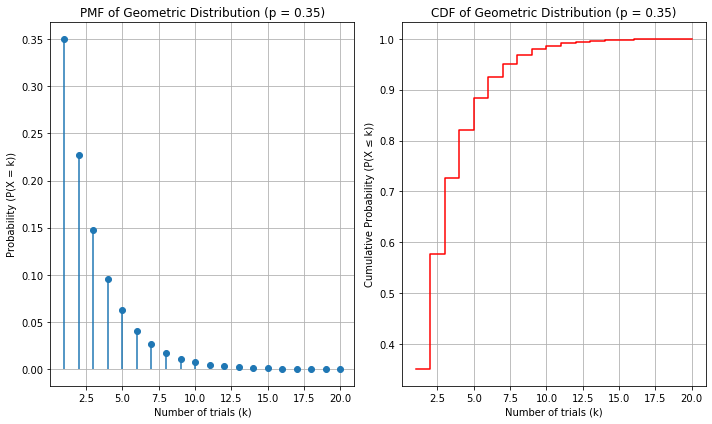

In [74]:
k_values = np.arange(1, 21)  # consideramos que dibujar las primeras 20 probabilidades basta

# PMF
pmf_values = X.pmf(k_values)

# CDF
cdf_values = X.cdf(k_values)

# Plot PMF
plt.figure(figsize=(10, 6))

# Plot PMF
plt.subplot(1, 2, 1) ## 1 fila, 2 columnas, primer elemento de la fila
plt.stem(k_values, pmf_values, basefmt=" ", use_line_collection=True)
plt.title("PMF of Geometric Distribution (p = 0.35)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Probability (P(X = k))")
plt.grid(True)

# Plot CDF
plt.subplot(1, 2, 2) ## 1 fila, 2 columnas, segundo elemento de la fila
plt.step(k_values, cdf_values, where='post', color='r', linestyle='-')
plt.title("CDF of Geometric Distribution (p = 0.35)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Cumulative Probability (P(X ≤ k))")
plt.grid(True)

# Mostramos todo
plt.tight_layout()
plt.show()

Aprobar a la cuarta convocatoria significa suspender las tres primeras y aprobar la siguiente, lo que se traduce en $X=3$. Por tanto, la solución es: 

$$P(X=3)=0.35\cdot (1-0.35)^3$$

In [79]:
X.pmf(3)

0.147875

El $14.7875\%$ de personas aprueba en cuarta convocatoria. 

<font color='blue'> <strong>  12. Diez amigos se juegan la cena del siguiente modo: Primero se lanza una moneda al aire y se apunta el resultado. A continuación cada uno de los diez lanza una moneda al aire y pagan la cena los que obtengan un resultado distinto del inicial, repartiendo la cuenta de forma equitativa. Si todos obtienen el mismo resultado que la primera tirada, el juego se repite. Sea X = ‘Número de repeticiones del juego antes de
que toque pagar’. Identifica la variable. ¿Cuál es la probabilidad de que alguien
pague antes de 9 repeticiones del juego? </strong> </font>




<h3> Solución. </h3>

Estamos nuevamente ante una variable aleatoria geométrica: $X\sim {\rm Geom}(p)$, donde $1-p$ es la probabilidad de repetir el juego. Téngase en cuenta que no nos preocupa quién va a pagar tras realizar las tiradas (en realidad, se hacen de una en una y en cuanto una sale distinta de las anteriores ya sabemos que el juego termina en esa iteración) sino solo cuántas veces hay que repetir el juego antes de que termine. 
Por tanto, $$P(X=k)=p\cdot (1-p)^k.$$ 
Ahora, debemos calcular $p$. 
Sea $C1=\text{ Cara en la tirada inicial}$ y $C2=\text{ Cruz en la tirada inicial}$. Entonces 
$$1-p= P(\{10 \text{ caras} \}|C1)P(C1)+P(\{10 \text{ cruces} \}|C2)P(C2) = 2\cdot (1/2)^{10}\frac{1}{2}=(1/2)^{10}$$
$$p=1-\left(\frac{1}{2}\right)^{10}$$
(De hecho, una vez sabemos que la moneda inicial es cara o cruz, la única forma de que el juego continúe es que todos obtengan dicho valor, y la probabilidad de esto es $(1/2)^{10}$. (La cosa cambiaría si la moneda (que usan todos) está trucada). Por tanto, el cálculo anterior lo podíamos haber evitado si hubiésemos querido).  

In [81]:
p=1-0.5**10
p

0.9990234375

In [83]:
from scipy.stats import geom
X=geom(p)

Veamos ahora cuál es la probabilidad de que alguien
pague antes de 9 tiradas: $P(X\leq 8)=F(8)$ (es decir, el número de fallos hasta que finaliza el juego, debe ser $\leq 8$). 

In [84]:
X.cdf(8)

1.0

Evidentemente, la probabilidad es en realidad menor que $1$, pero el ordenador trabaja con un número limitado de cifras significativas. Lo cierto es que tenemos en la práctica la certeza de que el juego no se prolongará demasiado y el restaurante cobrará sin tener que esperar apenas. De hecho, repetir el juego dos veces sería una verdadera proeza:

In [85]:
[X.cdf(1),X.cdf(2)]

[0.9990234375, 0.9999990463256836]

Evidentemente, este juego es solo aconsejable cuando hay pocos amigos (2 o 3, pero no más), y solo para librar a alguno de ellos de pagar su parte, porque la duración del juego es siempre mínima. Por ejemplo, con tres amigos, las cuentas serían las siguientes: 

In [86]:
p=1-0.5**3
X=geom(p)
[X.cdf(1),X.cdf(2),X.cdf(3),X.cdf(4)]

[0.875, 0.984375, 0.998046875, 0.999755859375]

Y con dos personas:

In [87]:
p=1-0.5**2
X=geom(p)
[X.cdf(1),X.cdf(2),X.cdf(3),X.cdf(4)]

[0.75, 0.9375, 0.984375, 0.99609375]

<font color='magenta'> <strong> 13. Se sabe que la probabilidad de ser niño es del $49\%$. Una familia decide tener hijos
hasta tener una niña. Sea X = ’Número de niños hasta que nazca una niña’.
Analiza la variable. ¿Cuál es la probabilidad de que sea la tercera?  </strong> </font>


<h3> Solución. </h3>

<font color='blue'> <strong> 14. Las matrículas de los coches contienen 10 números y suponemos que ya se han
hecho todas las posibles matrículas. Voy por la calle mirando matrículas. Me
interesa X = ‘Número de matrículas que veo antes de encontrar una que sea
capicúa’. Identifica la variable. Calcula 
$P(3 < X <7)$. </strong> </font>


<h3> Solución. </h3>

De nuevo es una variable Geométrica. Lo que necesitamos aquí es conocer la probabilidad de ver una matrícula capicúa, suponiendo que todas las matriculas posibles las vemos con idéntica probabilidad. 

Si $N$ es el número de una matrícula capicúa, debe ser de la forma 

$$N=a_1a_2a_3a_4a_5a_5a_4a_3a_2a_1$$

y de este tipo, habrá $10^5$ matrículas posibles porque cada valor $a_i$ pertenece al conjunto 

$$\{0,1,2,3,4,5,6,7,8,9\}.$$

Por otra parte, hay $10^{10}$ números de 10 cifras, por lo que la probabilidad $p$ de una matrícula capicúa es 

$$p=\frac{10^5}{10^{10}}=\frac{1}{10^5}.$$

Se sigue que $X\sim {\rm Geom}(10^{-5})$.  Por tanto, 

$$P(3 < X <7)=P(X=4)+P(X=5)+P(X=6)$$

In [89]:
p=1/10**5
from scipy.stats import geom
X=geom(p)

solucion = X.pmf(4)+X.pmf(5)+X.pmf(6)
solucion

2.999880001899986e-05

Otra forma: 

$$P(3 < X <7)=P(X\leq 6)-P(X\leq 3)$$

In [90]:
X.cdf(6)-X.cdf(3)

2.9998800018999852e-05